In [6]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [ ]:
class BMIState(TypedDict):
    weight: float  # in kilograms
    height: float  # in meters
    bmi: float     # Body Mass Index

    

In [14]:
def calculate_bmi(state: BMIState) -> BMIState:
    weight = state['weight']
    height = state['height']
    bmi = weight / (height ** 2)
    state['bmi'] = round(bmi,2)
    return state

In [ ]:
def label(state: BMIState) -> BMIState:
    bmi = state['bmi']
    if bmi < 18.5:
        label = "Underweight"
    elif 18.5 <= bmi < 24.9:
        label = "Normal"
    else:
        label = "Overweight"
    return {"label": label}


In [19]:
graph = StateGraph(BMIState, LabelState)

graph.add_node('calculate_bmi', calculate_bmi)
graph.add_node('label', label)

graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'label')
graph.add_edge('label', END)

workflow = graph.compile()


In [21]:
inital_state = {"weight":80, "height":1.73}

final_state = workflow.invoke(inital_state)

print(final_state)
print("Label:", final_state.get("label"))

{'weight': 80, 'height': 1.73, 'bmi': 26.73}
Label: None


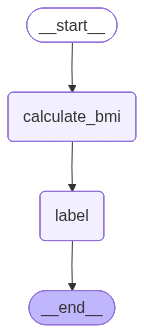

In [18]:
from IPython.display import Image 
Image(workflow.get_graph().draw_mermaid_png())